In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('vaers_jan_nov_2021.csv', low_memory=False)

In [3]:
df.columns

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [4]:
df.describe()

,VAERS_ID,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,8.908360e+05,890836.000000,700014.000000,542889.000000,414887.000000,311516.000000,819268.000000,728957.000000,1327.000000,65176.000000,799488.000000,890836.000000
mean,1.348523e+06,23.938168,23.938262,23.937684,23.939902,23.940053,50.053790,49.768582,0.061567,21.109120,28.330898,1.999589
std,2.682631e+05,0.250567,0.250345,0.251181,0.249035,0.250619,18.574649,18.740089,0.157421,1238.533017,595.442248,0.020265
min,9.166000e+05,23.100000,23.100000,23.100000,23.100000,23.100000,0.080000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.120193e+06,24.000000,24.000000,24.000000,24.000000,24.000000,36.000000,35.000000,0.000000,2.000000,0.000000,2.000000
50%,1.316782e+06,24.000000,24.000000,24.000000,24.000000,24.000000,50.000000,50.000000,0.000000,3.000000,1.000000,2.000000
75%,1.587308e+06,24.000000,24.000000,24.000000,24.000000,24.000000,65.000000,64.000000,0.000000,7.000000,7.000000,2.000000
max,1.845804e+06,24.100000,24.100000,24.100000,24.100000,24.100000,119.000000,120.000000,1.000000,99999.000000,44224.000000,2.000000


In [5]:
# We have 633063 unique VAERS_IDs, which tells us that around 29% of cases include multiple rows.  
df['VAERS_ID'].nunique()

633063

In [6]:
unique_df=df.drop_duplicates(subset=['VAERS_ID'])

In [7]:
unique_df.shape

(633063, 52)

In [8]:
#Check missing values
unique_df.isnull().sum()

VAERS_ID                0
SYMPTOM1                0
SYMPTOMVERSION1         0
SYMPTOM2           128688
SYMPTOMVERSION2    128688
SYMPTOM3           238862
SYMPTOMVERSION3    238862
SYMPTOM4           332856
SYMPTOMVERSION4    332856
SYMPTOM5           411063
SYMPTOMVERSION5    411063
VAX_TYPE                0
VAX_MANU                0
VAX_LOT            197791
VAX_DOSE_SERIES      2471
VAX_ROUTE          150006
VAX_SITE           163785
VAX_NAME                0
RECVDATE                0
STATE               77999
AGE_YRS             62321
CAGE_YR            127308
CAGE_MO            631963
SEX                     0
RPT_DATE           632803
SYMPTOM_TEXT          143
DIED               624623
DATEDIED           625575
L_THREAT           623250
ER_VISIT           633024
HOSPITAL           593574
HOSPDAYS           606364
X_STAY             632739
DISABLE            623304
RECOVD              58455
VAX_DATE            42441
ONSET_DATE          49132
NUMDAYS             74166
LAB_DATA    

In [9]:
# We will treat missing values later as we choose the columns to use for the analysis

### In this analysis we will focus on:
### 1) Age and gender
### 2) Death as outcome
### 3) Prevailing symptoms

### Gender and Age Analysis

In [10]:
#Create Dataframe grouped by Gender
unique_df_all=unique_df.groupby(['SEX'])['VAERS_ID'].count().reset_index()
#unique_df_all['Percent']=round(unique_df_all['VAERS_ID']/unique_df_all['VAERS_ID'].sum()*100, 1)

In [11]:
#Create function to add column "Percent" as we will need it later on

def add_Percent (df, base_column):
    """
    The function taked the dataframe and creates a new column "Percent" 
    which contains percentage values for a specific column
    
    Input: DataFrame, name of the column to convert to percents (str)
    Output: initial DataFrame with new column 'Percent'
    
    """
    df['Percent']=round(df[base_column]/df[base_column].sum()*100, 1)
    return df    

In [12]:
add_Percent(unique_df_all, 'VAERS_ID')
unique_df_all

,SEX,VAERS_ID,Percent
0,F,429324,67.8
1,M,181877,28.7
2,U,21862,3.5


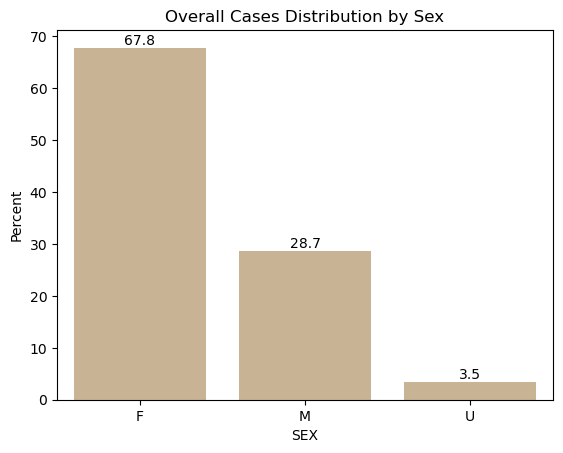

In [13]:
#Plot overall cases distridution by gender
import seaborn as sns
ax=sns.barplot(x="SEX", y='Percent', color="tan", data=unique_df_all)#.set(title='Overall Sex Distribution')
ax.bar_label(ax.containers[0])
ax.set(title='Overall Cases Distribution by Sex')
plt.show()

In [14]:
#Visualize age distribution for all unique cases 

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


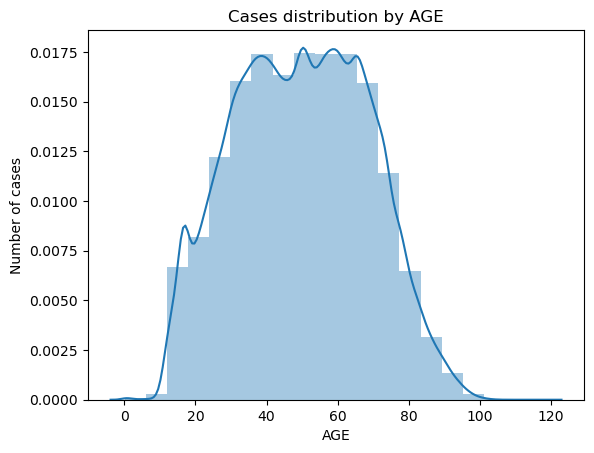

In [27]:
age_hist=sns.distplot(unique_df['AGE_YRS'].values, bins=20)
age_hist.set(title='Cases distribution by AGE')
age_hist.set_xlabel('AGE')
age_hist.set_ylabel('Number of cases')

plt.show()

### Death as Outcome

In [16]:
#Fill missing values in DIED column with 'N' = patient did not die
unique_df['DIED']=unique_df['DIED'].fillna('N')

<ipython-input-16-e0115f840336>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['DIED']=unique_df['DIED'].fillna('N')


In [17]:
#Create Dataframe grouped by Gender for survivors
unique_df_survivors=unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().reset_index()
add_Percent(unique_df_survivors, 'VAERS_ID')

,SEX,VAERS_ID,Percent
0,F,425805,68.2
1,M,177343,28.4
2,U,21475,3.4


In [18]:
#Create Dataframe grouped by Gender for died patients
unique_df_died=unique_df[unique_df.DIED=='Y'].groupby(['SEX'])['VAERS_ID'].count().reset_index()
add_Percent(unique_df_died, 'VAERS_ID')

,SEX,VAERS_ID,Percent
0,F,3519,41.7
1,M,4534,53.7
2,U,387,4.6


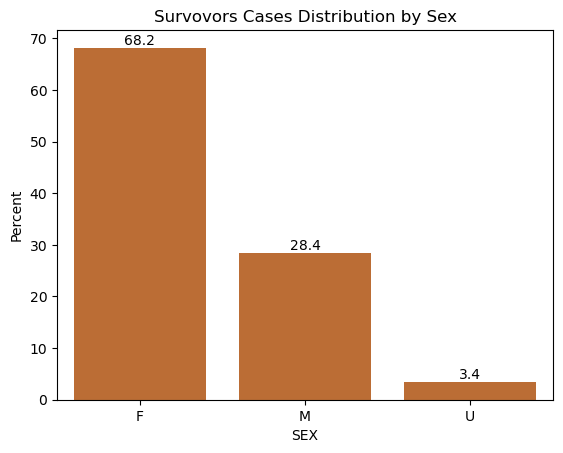

In [19]:
#Plot survived cases distridution by gender
bx=sns.barplot(x="SEX", y='Percent', data=unique_df_survivors, color='chocolate')
bx.bar_label(bx.containers[0])
bx.set(title='Survovors Cases Distribution by Sex')
plt.show()

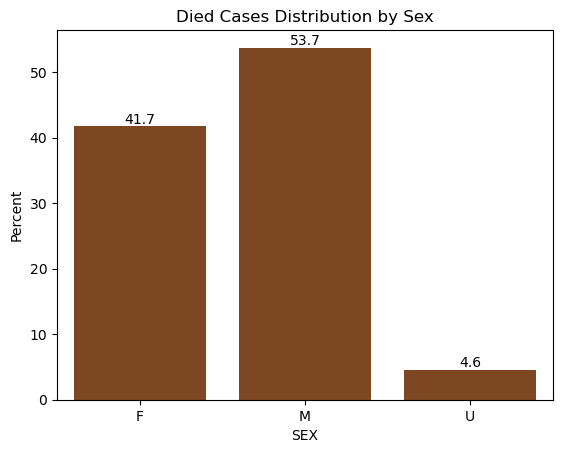

In [20]:
#Plot died cases distridution by gender
cx=sns.barplot(x="SEX", y='Percent', data=unique_df_died, color='saddlebrown')
cx.bar_label(cx.containers[0])
cx.set(title='Died Cases Distribution by Sex')
plt.show()

### We see that gender distribution for survived patient is very similar to overall distribution of the cases between genders. However, for patients who die the distribution is different with the share of men increased to 53.7%

In [21]:
#Prepare dataframe to visualize it
new_df = unique_df.groupby(['SEX', 'DIED'])['VAERS_ID'].count()
new_df = new_df.rename('Case_number').reset_index()
add_Percent(new_df, 'Case_number')

,SEX,DIED,Case_number,Percent
0,F,N,425805,67.3
1,F,Y,3519,0.6
2,M,N,177343,28.0
3,M,Y,4534,0.7
4,U,N,21475,3.4
5,U,Y,387,0.1


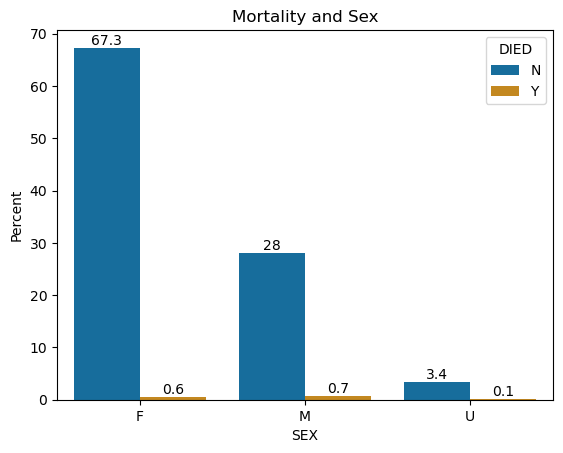

In [22]:
#Barplot the mortality and sex
percents=sns.barplot(x="SEX", y='Percent', hue='DIED', palette='colorblind', data=new_df)#.set(title='Overall Sex Distribution')
percents.bar_label(percents.containers[0])
percents.bar_label(percents.containers[1])
percents.set(title='Mortality and Sex')
plt.show()

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


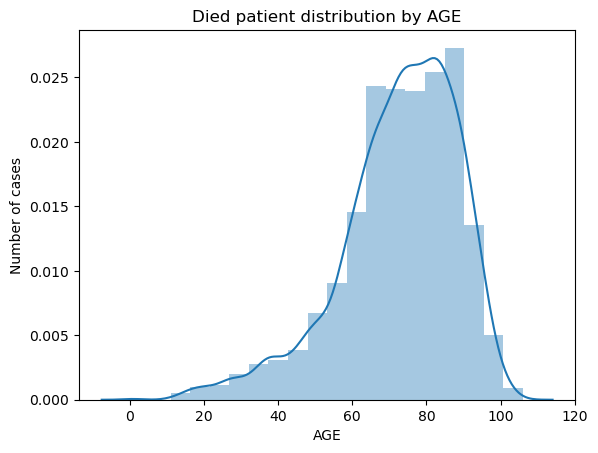

In [26]:
#Plot age distribution for died patients
age_hist_died=sns.distplot(unique_df[unique_df.DIED=='Y']['AGE_YRS'].values, bins=20)
age_hist_died.set(title='Died patient distribution by AGE')
age_hist_died.set_xlabel('AGE')
age_hist_died.set_ylabel('Number of cases')

plt.show()

## Symtpom analysis

### We see that each case may have multiple sympotms. Also we notice that some cases have "Unevaluable event" as Symptom1 and no other symptom, so we are going to exclude these cases from the analysis


In [32]:
unique_df_cropped=unique_df[unique_df.SYMPTOM1!='Unevaluable event']
unique_df_cropped=unique_df_cropped[~unique_df_cropped.SYMPTOM_TEXT.isna()]
all_symptoms=unique_df_cropped[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].stack().reset_index(drop=True)

In [33]:
#Look at 20 most frequent symptoms from all available symptoms
all_symptoms.value_counts().nlargest(20)

Headache                   99762
Fatigue                    86337
Chills                     82644
Dizziness                  62767
Pain                       52876
Pyrexia                    51689
Pain in extremity          41290
Nausea                     40882
Arthralgia                 38190
Injection site pain        31016
Dyspnoea                   30327
Myalgia                    26427
Rash                       26381
Asthenia                   25641
Injection site erythema    25068
Pruritus                   24949
COVID-19                   23860
Erythema                   20462
Diarrhoea                  19782
Chest pain                 17758
dtype: int64

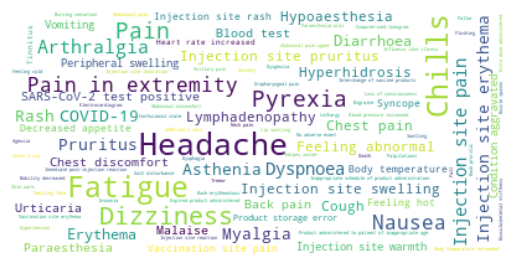

In [39]:
#Visualize the wordcloud for symptoms

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_tuples=dict([tuple(x) for x in all_symptoms.value_counts().reset_index().values])
wordcloud_freq_all = WordCloud(max_font_size=25, max_words=100,background_color='white').fit_words(all_tuples)
plt.imshow(wordcloud_freq_all, interpolation='bilinear')
plt.axis("off")
plt.show()

## Next things to be done for EDA:
## - Get the % of long term care residents and make separate analysis for them
## - Analyse the preexisting conditions